In [1]:
"""
Przygotuj funkcję materna_on_rectangle(), która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru. Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:

Rozszerzamy analizowany obszar o bufor równy wartości parametru cluster_radius.
W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru parent_intensity.
Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru cluster_radius) generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru daughter_intensity.
Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.
Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:

intensywność procesu macierzystego: 0.2
intensywność procesu potomnego: 10
promień klastra: 1
zakres wartości współrzędnej x: 0-20
zakres wartości współrzędnej y: 0-10
"""


SyntaxError: invalid syntax (2711571436.py, line 1)

In [6]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from IPython.display import display

In [7]:
#proces regularny Poissona

def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    #pole obszaru na ktorym generujemy punkty
    a = (x_lim[1] - x_lim[0])*(y_lim[1]-y_lim[0])
    oczekiwana = a*intensity
    
    iloscPkt = np.random.poisson(oczekiwana)
    #print(f"ilosc pkt: {iloscPkt}")
    
    
    #gdy mamy juz ilosc pkt, musimy kazdemy punktowi nadac jakas spolrzędną
    #utworzmy dwa wektory o dlugosci ilosci pkt ktore mamy wygenerowac
    
    wektorX = np.zeros(iloscPkt)
    wektorY = np.zeros(iloscPkt)
    
    for i in range(0, len(wektorX)):
        losowaX = random.uniform(x_lim[0], x_lim[1])
        losowaY = random.uniform(y_lim[0], y_lim[1])
        wektorX[i] = losowaX
        wektorY[i] = losowaY
        
        
    #print(wektorX)
    #print("teraz y")
    #print(wektorY)
    
    #wyrintowanie wykresu
    #sns.scatterplot(wektorX, wektorY)

   
    return pd.DataFrame({"X":wektorX, "Y":wektorY})


    

In [8]:
#Proces punktowy Materna

def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    zakresX = [x_lim[0] - 1/2*(cluster_radius), x_lim[1] + 1/2*cluster_radius]
    zakresY = [y_lim[0] - 1/2*(cluster_radius), y_lim[1] + 1/2*cluster_radius]
    print(f"zakres X wynosi {zakresX}")
    print(f"zakres Y wynosi {zakresY}")


    

    #na postawie jednorodnego procesu Poissona musimy wygenerowac punkty w oknie, gdzie:
    #parametr intensywnosci to parent_intensity
    #wymiary to 0:zakresX, oraz 0:zakresY
    
    wygenerowanePoisson = homogeneous_poisson_on_rectangle(parent_intensity, zakresX, zakresY)
    #print(wygenerowanePoisson)
    
    #sns.scatterplot(data = wygenerowanePoisson, x = "X", y = "Y")
    
    
    #teraz dla kazdego z utworzonych punktow, musimy utworzyc wokoło proces losowy poisona
    
    print(wygenerowanePoisson.at[1,'X'])
    
    #petla po wszysystkich wartosciach spolrzednych
    rozmiar = (wygenerowanePoisson.size)/2
    
    #rzutujemy na inta bo metoda at zwraca float
    wymiar = int(rozmiar)


    #  print([i,'X'])
    #  print([i, 'Y'])
    
    #tutaj trzeba poprawic
    #punktyPotomne=pd.DataFrame(0)
    
    #w tej petli dla kazdego z puntow z procesu poisoona, musimy utowrzyc kolejny proces o danym klastrze,
    # a wspolrzedne dodac do nowych, koncowych wektorów
    
    # 2**5 to dwa do potegi 5
    
    #zakres spolrzednych ktore musimy wsadzic do funkcji poissona
    # X:
    #  [wygenerowanePoisson.at[i,'X'] - math.sqrt((wygenerowanePoisson.at[i,'X']**2)+(wygenerowanePoisson.at[i,'Y']**2)), wygenerowanePoisson.at[i,'X'] + math.sqrt((wygenerowanePoisson.at[i,'X']**2)+(wygenerowanePoisson.at[i,'Y']**2))]
    #zakres Y :
    
    #  [wygenerowanePoisson.at[i,'Y'] - math.sqrt((wygenerowanePoisson.at[i,'X']**2)+(wygenerowanePoisson.at[i,'Y']**2)), wygenerowanePoisson.at[i,'Y'] + math.sqrt((wygenerowanePoisson.at[i,'X']**2)+(wygenerowanePoisson.at[i,'Y']**2))]

    #wykres2 = homogeneous_poisson_on_rectangle(10, [0,20], [0,10])
    punktyDocelowe = pd.DataFrame()
    #intensywność tego procesu jest okreslona przez daughter_intensity
    #rozklad poissona bedzie nam zwracał kilka punkow i je trzeba jakos przechowac
    #z kazdego z utworzonych wczesciej punkotw powstanie nam kilka kolejnych
    for i in range(wymiar):
        wynik = homogeneous_poisson_on_rectangle(daughter_intensity, [wygenerowanePoisson.at[i,'X'] - cluster_radius, wygenerowanePoisson.at[i,'X'] + cluster_radius], [wygenerowanePoisson.at[i,'Y'] - cluster_radius, wygenerowanePoisson.at[i,'Y'] + cluster_radius])
        wymiarPotomny = (wynik.size)/2
        #rzutujemy na inta bo metoda at zwraca float
        rozm2 = int(wymiarPotomny)
        #od razu bedzie usuwac puntktu ktore sa dalej od punktu niz cluster_radiaus
        for j in range(rozm2):
            #xb - x potomne = wynik.at[j, 'X']
            #yb - y potomne = wynik.at[j, 'Y']
            #xa - xrodzic x = wygenerowanePoisson.at[i,'X']
            #ya - rodzic y = wygenerowanePoisson.at[i,'Y']
            if math.sqrt((wynik.at[j, 'X'] - wygenerowanePoisson.at[i,'X'])**2+(wynik.at[j, 'Y'] - wygenerowanePoisson.at[i,'Y'])**2) > cluster_radius:
                #print(f" POZA KLASTREM punkt o wpolrzednych {wynik.at[j, 'X'], wynik.at[j, 'Y']} jest do wywanelnia")
                #wywal ten pkt
                wynik.drop([j], axis = 0, inplace = True)
            
            #sprawdzenie czy punkty nie znajduja sie w poszerzonym obszarze
                
            elif wynik.at[j, 'X'] > x_lim[1] or wynik.at[j, 'X'] < x_lim[0]:
                #print(f"POZA OBSZAREM X punkt o wpolrzednych {wynik.at[j, 'X'], wynik.at[j, 'Y']} jest do wywanelnia")
                wynik.drop([j], axis = 0, inplace = True)
            elif wynik.at[j, 'Y'] > y_lim[1] or wynik.at[j, 'Y'] < y_lim[0]:
                #print(f"POZA OBSZAREM Y punkt o wpolrzednych {wynik.at[j, 'X'], wynik.at[j, 'Y']} jest do wywanelnia")


                wynik.drop([j], axis = 0, inplace = True)

        #zostalo sklejenie macierzy wynik 
        #print(wynik)
        #axs = 1, czyli laczymy po wierszach
        punktyDocelowe = pd.concat([punktyDocelowe, wynik], axis = 0)
    

    
    #print("punkty macierzyste")
    #sns.scatterplot(data = wygenerowanePoisson, x = "X", y = "Y")

    print("punkty potomne")
    sns.scatterplot(data = punktyDocelowe, x = "X", y = "Y")


    #sprawdzeni
   
    #for k in range(dl1):
     #   print(f"{punktyDocelowe[k, 'Y'], punktyDocelowe[k, 'Y']}")
    

zakres X wynosi [-0.5, 20.5]
zakres Y wynosi [-0.5, 10.5]
14.454536711541593
punkty potomne


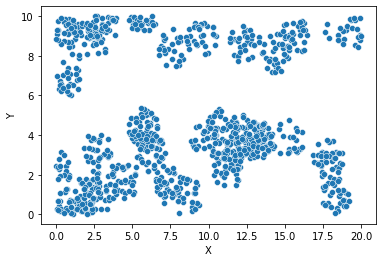

In [9]:
materna_on_rectangle(0.2, 10, 1, [0,20], [0,10])